# COMPLEMENT NAIVE BAYES ALGORITHM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dataset.csv')
df.head()

,UDI,Product ID,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Target,Failure_Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
del df['UDI']
del df['Product ID']
del df['Target']
del df['Type']

In [4]:
df=df.dropna()

In [5]:
df.columns

Index(['Air_temperature ', 'Process_temperature ', 'Rotational_speed ',
       'Torque ', 'Tool_wear ', 'Failure_Type'],
      dtype='object')

In [6]:
df.head()

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Failure_Type
0,298.1,308.6,1551,42.8,0,No Failure
1,298.2,308.7,1408,46.3,3,No Failure
2,298.1,308.5,1498,49.4,5,No Failure
3,298.2,308.6,1433,39.5,7,No Failure
4,298.2,308.7,1408,40.0,9,No Failure


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Failure_Type']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [8]:
df['Failure_Type'].dtype

dtype('int32')

In [9]:
df.head()

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Failure_Type
0,298.1,308.6,1551,42.8,0,1
1,298.2,308.7,1408,46.3,3,1
2,298.1,308.5,1498,49.4,5,1
3,298.2,308.6,1433,39.5,7,1
4,298.2,308.7,1408,40.0,9,1


In [10]:
x1 = df.drop(labels='Failure_Type', axis=1)
y1 = df.loc[:,'Failure_Type']

In [11]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({1: 9652, 0: 112, 3: 95, 2: 78, 5: 45, 4: 18})
OVER SAMPLING DATA COUNT  :  Counter({1: 9652, 3: 9652, 5: 9652, 2: 9652, 4: 9652, 0: 9652})


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  46329
NUMBER OF TEST DATASET      :  11583
TOTAL NUMBER OF DATASET    :  57912


In [13]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  46329
NUMBER OF TEST DATASET      :  11583
TOTAL NUMBER OF DATASET    :  57912


In [14]:
from sklearn.naive_bayes import ComplementNB

In [15]:
CNB = ComplementNB()
CNB.fit(x_train,y_train)

ComplementNB()

In [16]:
predicted = CNB.predict(x_test)

In [17]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,predicted)
print('THE CLASSIFICATION REPORT OF COMPLEMENTNB:\n\n',cr)

THE CLASSIFICATION REPORT OF COMPLEMENTNB:

               precision    recall  f1-score   support

           0       0.52      0.32      0.39      1930
           1       0.00      0.00      0.00      1930
           2       0.39      1.00      0.57      1931
           3       0.27      0.49      0.35      1931
           4       0.00      0.00      0.00      1931
           5       0.53      0.55      0.54      1930

    accuracy                           0.39     11583
   macro avg       0.28      0.39      0.31     11583
weighted avg       0.28      0.39      0.31     11583



In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF COMPLEMENTNB:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF COMPLEMENTNB:


 [[ 611    0  744  575    0    0]
 [ 110    0  332 1190    0  298]
 [   0    0 1931    0    0    0]
 [ 460    0  528  943    0    0]
 [   0    0  529  750    0  652]
 [   0    0  832   43    0 1055]]


In [19]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(CNB, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [39.20400587 40.36950704 39.94128821 39.328268   40.12260404]


In [20]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF COMPLEMENTNB IS :",a*100)

THE ACCURACY SCORE OF COMPLEMENTNB IS : 39.19537252870586


In [21]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF COMPLEMENTNB IS :",hl*100)

THE HAMMING LOSS OF COMPLEMENTNB IS : 60.80462747129414


THE CONFUSION MATRIX SCORE OF COMPLEMENTNB:


[[ 611    0  744  575    0    0]
 [ 110    0  332 1190    0  298]
 [   0    0 1931    0    0    0]
 [ 460    0  528  943    0    0]
 [   0    0  529  750    0  652]
 [   0    0  832   43    0 1055]]


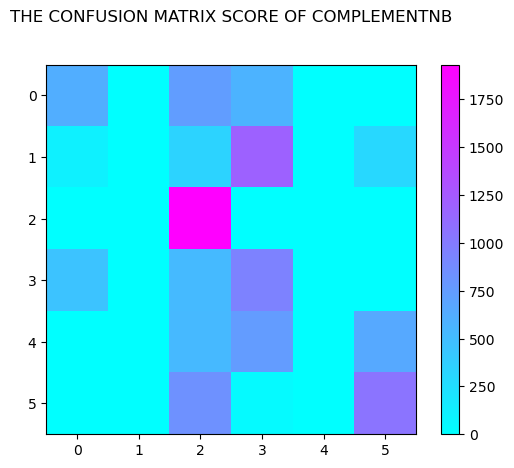

In [22]:
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF COMPLEMENTNB\n\n', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF COMPLEMENTNB:\n\n')
print(cm)
plot_confusion_matrix(cm)

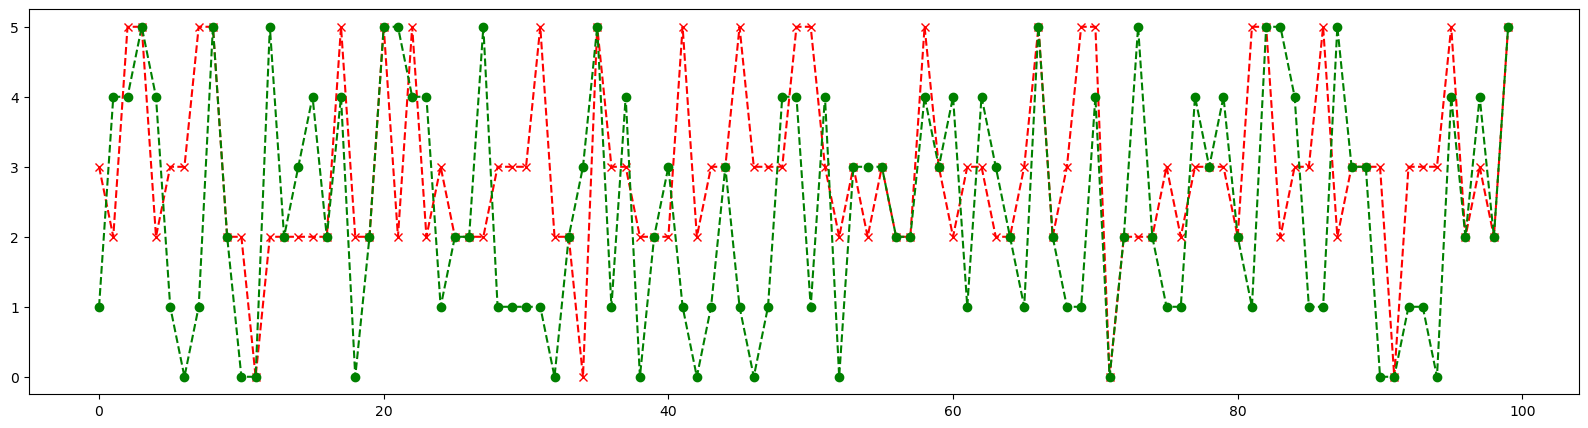

In [23]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()